## Assignment 1: Bayesian Decision Theory and Parametric Estimation

- [ ] I. Loading the data and building a Gaussian Classifier
  - [x] a) Loading the Abalon Dataset. Ignoring the sex label and compute `rings_hat` which is the average value of rings of the whole data set
  - [x] b) Load the data as two numpy arrays `X` attributes and `y` labels
  - [x] c) Split the data set in training and validation
  - [ ] d) Build a Gaussian Classifier for each attribute.
    - [ ] Record parameters (I think those are mean and variance)
    - [ ] Accuracy, Precision & Recall
    - [ ] Which classifier is best
    - [ ] Draw curves for posterior distribution. Show decision boundary
- [ ] II. Bivariate models and ROC 
  - [ ] For each pair of features, create a bivariate Gaussian Classifier. The parameter of each of these models will be, the mean of the features BUT the covariance matrix will be of all of the classes.
  - [ ] For each combination, estimate the parameters to make predictions. Report results
  - [ ] Draw ROC curves for model of Q1 and these Q2 models
- [ ] III. Discriminant Functions & Regions
  - [ ] For the best model in Q2 draw regions
  - [ ] Calculate the decision boundary of the regions: Equation!
- [ ] IV. Regions for the best
  - [ ] For the best bivariate model in Q2 change the covariance matrix by a random one (could be different for each class *i dont quite understand this part*)
  - [ ] Draw regions
  - [ ] Add a rejection region 



## Como trabajar
Total: 28 modelos. 7 univariados y 21 bivariados.
14 modelos por grupo
### Univariados
- Length 
- Diameter
- Height
- Whole weight
- Shucked weight
- Viscera weight
- Shell weight


In [2]:
import pandas as pd
import numpy as np
from math import floor
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

In [3]:
df_features = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", 
                 names=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"])


In [4]:
df_features.drop(columns=["Sex"], inplace=True)
df_features.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
rings_hat= floor(df_features["Rings"].mean())
rings_hat

9

In [6]:
df_features["Rings"] = np.where(df_features["Rings"] >= rings_hat, 1, 0)

In [7]:
X = df_features.drop(columns=["Rings"]).to_numpy().astype('float')
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [8]:
y = df_features["Rings"].to_numpy().astype('float')
y

array([1., 0., 1., ..., 1., 1., 1.])

In [9]:
train_features, train_labels, test_features, test_labels = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
train_features

array([[0.525 , 0.38  , 0.135 , ..., 0.261 , 0.159 , 0.175 ],
       [0.465 , 0.36  , 0.105 , ..., 0.172 , 0.107 , 0.175 ],
       [0.52  , 0.425 , 0.155 , ..., 0.297 , 0.123 , 0.255 ],
       ...,
       [0.51  , 0.395 , 0.125 , ..., 0.244 , 0.1335, 0.188 ],
       [0.575 , 0.465 , 0.12  , ..., 0.516 , 0.2185, 0.235 ],
       [0.595 , 0.475 , 0.16  , ..., 0.547 , 0.231 , 0.271 ]])

### d) Univariate Gaussian Classifier for each attribute
**Atributtes:**
- Length
- Diameter 
- Height 
- Whole weight
- Shucked weight
- Viscera weight
- Shell weight


In [51]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self,attr):
        self.attributes = attr
        self.mean = None
        self.variance = None
        self.prior = None

    def fit(self, X, y):
      # It calculates the mean, variance, and prior of each class in the training 
      # data and stores them in the corresponding attributes of the classifier

        
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.mean = np.zeros((n_classes, n_features))
        self.variance = np.zeros((n_classes, n_features))
        self.prior = np.zeros(n_classes)

        for c in self.classes:
            c=int(c)
            X_c = X[c == y]
            self.mean[c, :] = X_c.mean(axis=0)
            self.variance[c, :] = X_c.var(axis=0)
            self.prior[c] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
      # makes predictions on the input data X using the classifier's mean, 
      # variance, and prior attributes. It calls the _predict method for
      # each data point in X and returns an array of predicted labels

        
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
      # computes the posterior probability of each class for the input data point x 
      # and returns the class with the highest posterior probability as the predicted label. 
      # It uses the _pdf method to calculate the class conditional probability of x.
        posteriors = []

        for idx, c in enumerate(self.classes):
            prior = np.log(self.prior[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.variance[class_idx]
        numerator = np.exp(-(x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    def __str__(self):
      return f"Atribute(s): {self.attributes} \n Mean: {self.mean} \n Variance: {self.variance}"


In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

#### Length

In [14]:
X_length = X[:,0].astype('float')
X_length

array([0.455, 0.35 , 0.53 , ..., 0.6  , 0.625, 0.71 ])

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_length, y, test_size=0.33, random_state=42)


In [19]:
X_train.reshape(-1, 1).shape

(2798, 1)

In [53]:
# Train the classifier
clf = GaussianNaiveBayes("Length")
clf.fit(X_train.reshape(-1, 1), y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test.reshape(-1, 1))

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the precision of the classifier
accuracy =  precision_score(y_test, y_pred)
print(f"Precision: {accuracy}")

# Calculate the recall of the classifier
accuracy =  recall_score(y_test, y_pred)
print(f"Recall: {accuracy}")

Accuracy: 0.8187092095721538
Precision: 0.8758700696055685
Recall: 0.8407572383073497


In [67]:
X_xd = pd.DataFrame({"x":X_test,"y":y_pred})

In [68]:
X_xd

,x,y
0,0.3250,1.0
1,0.2450,1.0
2,0.3350,1.0
3,0.3800,1.0
4,0.2150,1.0
...,...,...
1374,0.0835,0.0
1375,0.0350,0.0
1376,0.1300,0.0
1377,0.1195,0.0


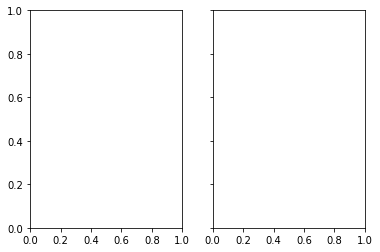

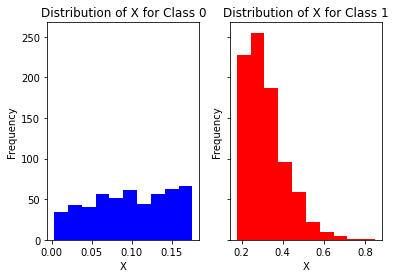

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharey=True)

# Create two subplots for each class
fig, ax = plt.subplots(1, 2, sharey=True)

# Plot the histogram for class 0
ax[0].hist(np.array(X_xd.loc[X_xd['y'] == 0.0, 'x']), color='blue')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of X for Class 0')

# Plot the histogram for class 1
ax[1].hist(np.array(X_xd.loc[X_xd['y'] == 1.0, 'x']), bins=10, color='red')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of X for Class 1')

# Show the plot
plt.show()

In [54]:
y_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [52]:
column_names = list(df_features.columns.values)
for attr in range(X.shape[1]):
  attr_name= column_names[attr]
  X_feature = X[:,attr].astype('float')
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X_feature, y, test_size=0.33, random_state=42)
  # Train the classifier
  clf = GaussianNaiveBayes(attr_name)
  clf.fit(X_train.reshape(-1, 1), y_train)

  # Make predictions on the testing set
  y_pred = clf.predict(X_test.reshape(-1, 1))

  # Print Model Parameters
  print(clf)
  # Calculate the accuracy of the classifier
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy}")

  # Calculate the precision of the classifier
  accuracy =  precision_score(y_test, y_pred)
  print(f"Precision: {accuracy}")

  # Calculate the recall of the classifier
  accuracy =  recall_score(y_test, y_pred)
  print(f"Recall: {accuracy}")

  print("\n\n")



Atribute(s): Length 
 Mean: [[0.42150108]
 [0.57775641]] 
 Variance: [[0.01209354]
 [0.00734216]]
Accuracy: 0.7897026831036983
Precision: 0.8015873015873016
Recall: 0.8997772828507795



Atribute(s): Diameter 
 Mean: [[0.32208423]
 [0.45275374]] 
 Variance: [[0.00809641]
 [0.00499085]]
Accuracy: 0.7933284989122552
Precision: 0.8037661050545094
Recall: 0.9031180400890868



Atribute(s): Height 
 Mean: [[0.10694384]
 [0.15650908]] 
 Variance: [[0.0021318 ]
 [0.00085903]]
Accuracy: 0.7998549673676577
Precision: 0.8013565891472868
Recall: 0.920935412026726



Atribute(s): Whole weight 
 Mean: [[0.43234341]
 [1.03596928]] 
 Variance: [[0.09209267]
 [0.19726258]]
Accuracy: 0.8005801305293692
Precision: 0.8626309662398137
Recall: 0.8251670378619154



Atribute(s): Shucked weight 
 Mean: [[0.19790497]
 [0.44464076]] 
 Variance: [[0.02135067]
 [0.04438742]]
Accuracy: 0.7708484408992023
Precision: 0.8368055555555556
Recall: 0.8051224944320713



Atribute(s): Viscera weight 
 Mean: [[0.09367819]


In [42]:
column_names = list(df_features.columns.values)

In [44]:
column_names

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']